1. train : 학습용 데이터셋

	├ 10001 : 데이터 고유 아이디

	│	├ 10001.jpg : 이미지 파일

	│	├ 10001.csv : 환경 데이터

	│		└ 촬영 전 48 시간의 "측정 시각", "내부 온도", "내부 습도", "내부 이슬점", "내부 CO2", "외부 풍속", "외부 누적일사" 등의 환경 정보

	│	└ 10001.json :

	│		├ description 

	│		│	├ image : 이미지 파일 이름

	│		│	├ date : 촬영 날짜

	│		│	├ time : 촬영 시간

	│		│	├ region : 촬영 지역

	│		│	├ height : 이미지 높이

	│		│	├ width : 이미지 너비

	│		│	└  task : 데이터 종류 (질병/해충/병해/정상 구분)

	│		└ annotations

	│				├ disease : 작물 상태 코드

	│				├ crop : 작물 코드

	│				├ area : 작물 촬영 부위

	│				├ grow : 작물의 생육 단계 

	│				├ risk : 질병 피해 정도

	│				├ bbox : 주목 객체 바운딩 박스 (x, y, w, h 형태)

	│				└ part : 병해 부위 바운딩 박스 (x, y, w, h 형태)

	│

	├ 10002

	├ 10003

	└ ...

	[추가] train.csv : train set에 대한 정답 파일

 image : 이미지 파일 이름
 label : "{작물 코드}_{작물 상태 코드}_{질병 피해 정도}" 형태의 문자열
 "{crop}_{disease}_{risk}"




2. test : 평가용 데이터셋

	├ 10001 : 데이터 고유 아이디

	│	├ 10001.csv : 환경 데이터

	│		└ 촬영 전 48 시간의 "측정 시각", "내부 온도", "내부 습도", "내부 이슬점", "내부 CO2", "외부 풍속", "외부 누적일사" 등의 환경 정보

	│	└ 10001.jpg : 이미지 파일

	│

	├ 10002

	├ 10003

	└ ...



3. sample_submission.csv : 제출용 양식

 image : 이미지 파일 이름
 label : "{작물 코드}_{작물 상태 코드}_{질병 피해 정도}" 형태의 문자열
 "{crop}_{disease}_{risk}"

In [151]:
import pandas as pd
import json
from glob import glob
from tqdm import tqdm
import seaborn as sns

In [72]:
#part(질병이 있는 데이터에만 표시 없는 데이터는 [])
L = 17367
json_path = f'데이터톤/train/{L}/{L}.json'
with open(json_path,'r') as f:
    json_data = json.load(f)
    json_data = pd.json_normalize(json_data)
json_data
#csv에 넣을 값들 
#['description']['image'],['annotations']['disease'],['annotations']['grow'],['annotations']['risk'],['annotations']['crop']

,description.date,description.image,description.task,description.width,description.time,description.region,description.height,annotations.area,annotations.disease,annotations.grow,annotations.bbox,annotations.part,annotations.risk,annotations.crop
0,20211007,17367.jpg,0,682,0838,0,512,3,00,12,"[{'x': 75.64086979166666, 'h': 437.29708333333...",[],0,4


In [73]:
#측정시간 간격은 10min but row count는 모두 다름. 
csv_path = f'데이터톤/train/{L}/{L}.csv'
csv_data = pd.read_csv(csv_path)
csv_data.head()

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,배지 중량 최저,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적
0,2021-10-07 08:30:00,25.5,26.1,24.2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2021-10-07 08:20:00,23.5,24.2,23.2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,2021-10-07 08:10:00,22.8,23.1,22.6,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,2021-10-07 08:00:00,22.3,22.5,22.1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,2021-10-07 07:50:00,21.9,22.0,21.8,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [74]:
csv_data.columns

Index(['측정시각', '내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 온도 2 평균',
       '내부 온도 2 최고', '내부 온도 2 최저', '내부 온도 3 평균', '내부 온도 3 최고', '내부 온도 3 최저',
       '내부 온도 4 평균', '내부 온도 4 최고', '내부 온도 4 최저', '내부 습도 1 평균', '내부 습도 1 최고',
       '내부 습도 1 최저', '내부 습도 2 평균', '내부 습도 2 최고', '내부 습도 2 최저', '내부 습도 3 평균',
       '내부 습도 3 최고', '내부 습도 3 최저', '내부 습도 4 평균', '내부 습도 4 최고', '내부 습도 4 최저',
       '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저', '내부 CO2 평균', '내부 CO2 최고',
       '내부 CO2 최저', '외부 풍속 평균', '외부 풍속 최고', '외부 풍속 최저', '내부 EC 1 평균',
       '내부 EC 1 최고', '내부 EC 1 최저', '내부 PH 1 평균', '내부 PH 1 최고', '내부 PH 1 최저',
       '배지 중량 평균', '배지 중량 최고', '배지 중량 최저', '양액 온도 평균', '양액 온도 최고', '양액 온도 최저',
       '외부 풍향 수치', '외부 풍향', '외부 빗물 시간', '외부 누적일사 평균', '양액 급액 누적', '양액 배액 누적'],
      dtype='object')

In [75]:
# -가 null 판정을 받지않기 때문에 describe에 나타나는 col로 판단.
csv_data.describe()

,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,24.309524,24.484354,24.131633,78.489116,80.216327,76.895238,19.750000,20.311224,19.247619
std,5.628461,5.731003,5.525595,18.661697,17.295394,19.779425,2.139196,2.500043,1.921811
min,18.800000,18.900000,18.800000,37.900000,41.300000,34.700000,17.300000,17.300000,16.400000
25%,19.525000,19.600000,19.500000,61.375000,63.775000,57.550000,18.400000,18.700000,18.000000
50%,21.000000,21.100000,20.900000,90.200000,90.900000,89.400000,19.000000,19.250000,18.900000
75%,30.675000,30.900000,30.175000,92.350000,93.075000,91.800000,20.500000,21.275000,19.775000
max,35.600000,35.900000,35.200000,97.100000,97.700000,96.100000,27.100000,28.400000,26.400000


In [78]:
sample = glob('데이터톤/train/*')[0]
sample_csv = pd.read_csv(glob(sample+'/*.csv')[0])
sample_csv.head()

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,배지 중량 최저,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적
0,2021-10-13 20:20:00,20.7,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,2021-10-13 20:10:00,20.9,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,2021-10-13 20:00:00,21.0,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,2021-10-13 19:50:00,20.9,21.5,20.4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,2021-10-13 19:40:00,21.0,21.5,20.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
len(glob('데이터톤/train/*'))

5767

In [ ]:
sam = glob('데이터톤/train/*')[0]
all_csv = pd.read_csv(glob(sam+'/*.csv')[0])

for i in range(1,len(glob('데이터톤/train/*'))):
    sample = glob('데이터톤/train/*')[i]
    sample_csv = pd.read_csv(glob(sample+'/*.csv')[0])
    all_csv = pd.concat([all_csv,sample_csv])

In [ ]:
#'-' 1778127 인 컬럼들 골라내기
for i in all_csv.columns:
    print(all_csv[i].value_counts())
    


2021-11-01 14:50:00    619
2021-09-14 16:10:00    617
2021-11-01 19:00:00    616
2021-11-01 18:10:00    616
2021-11-01 19:30:00    616
                      ... 
2021-09-17 09:50:00      1
2021-10-25 15:40:00      1
2021-10-25 15:50:00      1
2021-10-25 16:00:00      1
2021-07-06 10:50:00      1
Name: 측정시각, Length: 14282, dtype: int64
20.1    24380
19.2    18801
19.4    17656
19.1    16461
19.5    15963
        ...  
45.8        8
44.3        8
44.6        4
46.6        4
44.2        4
Name: 내부 온도 1 평균, Length: 435, dtype: int64
20.1    23087
19.3    20167
18.8    17398
19.8    17066
19.4    16936
        ...  
44.2        4
46.9        4
45.7        4
44.8        4
44.4        4
Name: 내부 온도 1 최고, Length: 434, dtype: int64
20.1    23363
19.1    22186
19.3    17847
18.6    17204
17.6    16790
        ...  
46.4        8
47.0        4
46.2        4
43.9        4
44.4        4
Name: 내부 온도 1 최저, Length: 432, dtype: int64
-       1769895
11.1        308
10.6        280
11.3        280
11.2 

In [79]:
drop_col = [
    '내부 온도 4 평균','내부 온도 4 최고','내부 온도 4 최저',
    '내부 습도 4 평균','내부 습도 4 최고','내부 습도 4 최저',
    '외부 풍속 평균','외부 풍속 최고','외부 풍속 최저',
    '내부 EC 1 평균','내부 EC 1 최고','내부 EC 1 최저',
    '내부 PH 1 평균','내부 PH 1 최고','내부 PH 1 최저',
    '배지 중량 평균','배지 중량 최고','배지 중량 최저',
    '양액 온도 평균','양액 온도 최고','양액 온도 최저',
    '외부 풍향 수치','외부 풍향','외부 빗물 시간',
    '양액 급액 누적','양액 배액 누적'
] 

In [ ]:
sample_csv.drop(columns=drop_col)
sample_csv['image'] = 123
sample_csv

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,양액 온도 평균,양액 온도 최고,양액 온도 최저,외부 풍향 수치,외부 풍향,외부 빗물 시간,외부 누적일사 평균,양액 급액 누적,양액 배액 누적,image
0,2021-07-13 09:50:00,36.9,37.1,36.5,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
1,2021-07-13 09:50:00,36.1,36.4,35.8,-,-,-,-,-,-,...,-,-,-,-,-,-,679.0,-,-,123
2,2021-07-13 09:40:00,36.0,36.3,35.9,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
3,2021-07-13 09:40:00,35.4,35.6,35.3,-,-,-,-,-,-,...,-,-,-,-,-,-,580.3,-,-,123
4,2021-07-13 09:30:00,35.6,35.8,35.4,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,2021-07-11 09:20:00,35.2,35.3,34.9,-,-,-,-,-,-,...,-,-,-,-,-,-,385.7,-,-,123
584,2021-07-11 09:10:00,35.2,35.5,35.0,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123
585,2021-07-11 09:10:00,35.0,35.3,34.7,-,-,-,-,-,-,...,-,-,-,-,-,-,473.2,-,-,123
586,2021-07-11 09:00:00,34.4,35.0,33.8,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,123


In [118]:
# all_csv = pd.DataFrame()
all_json_csv = pd.DataFrame()
for i in tqdm(range(len((glob('데이터톤/train/*')))),desc='진행률'):
    path = glob('데이터톤/train/*')[i]
    # csvs = pd.read_csv(glob(path+'/*.csv')[0])
    jsons = json.load(open(glob(path+'/*.json')[0],'r'))
    # csvs['image'] = jsons['description']['image']
    # csvs = csvs.drop(columns=drop_col)
    # all_csv = pd.concat([all_csv,csvs])
    
    json_csv = pd.json_normalize(jsons)
    all_json_csv = pd.concat([all_json_csv,json_csv])
all_json_csv = all_json_csv[['description.image','annotations.crop','annotations.disease','annotations.grow','annotations.risk']]
all_json_csv.columns = ['image','crop','disease','grow','risk']    
path = '.'
# all_csv.to_csv(path+'/전체시계열_csv.csv',index=False)
all_json_csv.to_csv(path+'/json_csv.csv',index=False)


진행률: 100%|██████████| 5767/5767 [01:13<00:00, 78.09it/s]


In [95]:
type(jsons['description']['image'])

str

In [116]:
all_json_csv

,image,crop,disease,grow,risk
0,38254.jpg,2,00,13,0
0,21379.jpg,4,00,13,0
0,29114.jpg,6,00,24,0
0,51832.jpg,5,b6,13,1
0,65835.jpg,3,00,12,0
...,...,...,...,...,...
0,30042.jpg,3,00,11,0
0,59218.jpg,4,00,12,0
0,23031.jpg,6,00,24,0
0,14481.jpg,3,b8,13,1


In [136]:
#crop 1인 데이터를 필터해서 csv로 만들기
crop_1 = all_json_csv[all_json_csv['crop']==1]
total_data = pd.DataFrame()
for i in crop_1['image']:
    # print(i[:-4])
    filter_path = '데이터톤/train/'
    filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
    filter_data['image'] = i
    filter_data.drop(columns=drop_col,inplace=True)
    total_data = pd.concat([total_data,filter_data])
total_data

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,내부 습도 3 최고,내부 습도 3 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,내부 CO2 평균,내부 CO2 최고,내부 CO2 최저,외부 누적일사 평균,image
0,2021-10-15 09:10:00,23.0,23.1,22.9,-,-,-,-,-,-,...,-,-,17.9,18.1,17.7,452.2,456.0,447.0,-,26538.jpg
1,2021-10-15 09:00:00,23.1,23.2,22.9,-,-,-,-,-,-,...,-,-,18.2,18.4,17.9,451.5,456.0,448.0,-,26538.jpg
2,2021-10-15 08:50:00,22.6,22.9,22.3,-,-,-,-,-,-,...,-,-,18.1,19.0,17.4,455.1,458.0,452.0,-,26538.jpg
3,2021-10-15 08:40:00,22.0,22.3,21.8,-,-,-,-,-,-,...,-,-,17.6,17.8,17.4,456.9,460.0,454.0,-,26538.jpg
4,2021-10-15 08:30:00,22.0,22.1,21.9,-,-,-,-,-,-,...,-,-,17.8,18.2,17.4,456.7,459.0,453.0,-,26538.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2021-10-05 09:40:00,29.7,30.3,29.4,-,-,-,-,-,-,...,-,-,23.8,24.9,22.7,407.9,412.0,402.0,-,55277.jpg
290,2021-10-05 09:30:00,29.5,29.9,29.0,-,-,-,-,-,-,...,-,-,24.4,25.3,23.7,419.0,429.0,410.0,-,55277.jpg
291,2021-10-05 09:20:00,28.6,29.1,28.1,-,-,-,-,-,-,...,-,-,23.6,24.6,22.7,432.1,438.0,428.0,-,55277.jpg
292,2021-10-05 09:10:00,27.6,28.2,27.0,-,-,-,-,-,-,...,-,-,23.7,24.4,23.1,432.6,437.0,427.0,-,55277.jpg


In [142]:
for j in total_data.columns:
    print(total_data[j].value_counts())

2021-10-07 00:40:00    257
2021-10-06 23:30:00    257
2021-10-06 22:00:00    257
2021-10-06 22:10:00    257
2021-10-06 22:20:00    257
                      ... 
2021-10-15 10:30:00      5
2021-09-16 18:20:00      3
2021-09-23 11:50:00      3
2021-10-08 10:10:00      2
2021-11-02 10:20:00      2
Name: 측정시각, Length: 1939, dtype: int64
19.3    5598
19.6    3693
19.2    3557
19.4    3538
19.1    3279
        ... 
14.2      28
13.5      28
13.0      28
11.5      28
15.0      28
Name: 내부 온도 1 평균, Length: 227, dtype: int64
19.3    6848
19.6    4845
19.4    4191
20.3    3765
19.8    3600
        ... 
9.4       28
14.1      28
12.8      28
12.2      28
9.7       28
Name: 내부 온도 1 최고, Length: 232, dtype: int64
19.3    5031
19.1    4921
19.6    3941
19.2    3838
20.1    3514
        ... 
14.4      28
14.0      28
13.8      28
11.2      28
13.7      28
Name: 내부 온도 1 최저, Length: 226, dtype: int64
-       224846
11.1       308
10.6       280
11.3       280
11.2       196
         ...  
32.0        2

In [149]:
#crop 1인 데이터를 필터해서 csv로 만들기
drop_col = [
    '내부 온도 4 평균','내부 온도 4 최고','내부 온도 4 최저',
    '내부 습도 4 평균','내부 습도 4 최고','내부 습도 4 최저',
    '외부 풍속 평균','외부 풍속 최고','외부 풍속 최저',
    '내부 EC 1 평균','내부 EC 1 최고','내부 EC 1 최저',
    '내부 PH 1 평균','내부 PH 1 최고','내부 PH 1 최저',
    '배지 중량 평균','배지 중량 최고','배지 중량 최저',
    '양액 온도 평균','양액 온도 최고','양액 온도 최저',
    '외부 풍향 수치','외부 풍향','외부 빗물 시간',
    '양액 급액 누적','양액 배액 누적'
] 

crop_1 = all_json_csv[all_json_csv['crop']==1]

def filter(data,drop_col):
    total_data = pd.DataFrame()
    for i in data['image']:
        # print(i[:-4])
        filter_path = '데이터톤/train/'
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data['image'] = i
        filter_data.drop(columns=drop_col,inplace=True)
        total_data = pd.concat([total_data,filter_data])

    return total_data

filter(crop_1,drop_col)

,측정시각,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 2 평균,내부 온도 2 최고,내부 온도 2 최저,내부 온도 3 평균,내부 온도 3 최고,내부 온도 3 최저,...,내부 습도 3 최고,내부 습도 3 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,내부 CO2 평균,내부 CO2 최고,내부 CO2 최저,외부 누적일사 평균,image
0,2021-10-15 09:10:00,23.0,23.1,22.9,-,-,-,-,-,-,...,-,-,17.9,18.1,17.7,452.2,456.0,447.0,-,26538.jpg
1,2021-10-15 09:00:00,23.1,23.2,22.9,-,-,-,-,-,-,...,-,-,18.2,18.4,17.9,451.5,456.0,448.0,-,26538.jpg
2,2021-10-15 08:50:00,22.6,22.9,22.3,-,-,-,-,-,-,...,-,-,18.1,19.0,17.4,455.1,458.0,452.0,-,26538.jpg
3,2021-10-15 08:40:00,22.0,22.3,21.8,-,-,-,-,-,-,...,-,-,17.6,17.8,17.4,456.9,460.0,454.0,-,26538.jpg
4,2021-10-15 08:30:00,22.0,22.1,21.9,-,-,-,-,-,-,...,-,-,17.8,18.2,17.4,456.7,459.0,453.0,-,26538.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2021-10-05 09:40:00,29.7,30.3,29.4,-,-,-,-,-,-,...,-,-,23.8,24.9,22.7,407.9,412.0,402.0,-,55277.jpg
290,2021-10-05 09:30:00,29.5,29.9,29.0,-,-,-,-,-,-,...,-,-,24.4,25.3,23.7,419.0,429.0,410.0,-,55277.jpg
291,2021-10-05 09:20:00,28.6,29.1,28.1,-,-,-,-,-,-,...,-,-,23.6,24.6,22.7,432.1,438.0,428.0,-,55277.jpg
292,2021-10-05 09:10:00,27.6,28.2,27.0,-,-,-,-,-,-,...,-,-,23.7,24.4,23.1,432.6,437.0,427.0,-,55277.jpg


In [153]:
json_csv = pd.read_csv('json_csv')
json_csv

,image,crop,disease,grow,risk
0,38254.jpg,2,00,13,0
1,21379.jpg,4,00,13,0
2,29114.jpg,6,00,24,0
3,51832.jpg,5,b6,13,1
4,65835.jpg,3,00,12,0
...,...,...,...,...,...
5762,30042.jpg,3,00,11,0
5763,59218.jpg,4,00,12,0
5764,23031.jpg,6,00,24,0
5765,14481.jpg,3,b8,13,1


In [198]:
json_csv['image'][0][:-4]

'38254'

In [162]:
filter = (json_csv['crop'] == 5) & (json_csv['disease'] != '00')
crop_1 = json_csv[filter]
crop_1
def filter(data,drop_col):
    total_data = pd.DataFrame()
    for i in data['image']:
        # print(i[:-4])
        filter_path = '데이터톤/train/'
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data['image'] = i
        filter_data.drop(columns=drop_col,inplace=True)
        total_data = pd.concat([total_data,filter_data])

    return total_data
# 
# filter(crop_1,drop_col)

,image,crop,disease,grow,risk
3,51832.jpg,5,b6,13,1
15,43993.jpg,5,a7,13,2
17,65499.jpg,5,b7,11,1
19,20409.jpg,5,b7,11,1
21,44528.jpg,5,b7,11,1
...,...,...,...,...,...
5709,20011.jpg,5,b7,11,1
5732,18273.jpg,5,b7,11,1
5741,44305.jpg,5,b8,13,1
5742,25332.jpg,5,b6,13,1


In [225]:
csv_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 습도 1 평균', '내부 습도 1 최고', 
                '내부 습도 1 최저', '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']
filter_path = '데이터톤/train/'
filter_data = pd.read_csv(filter_path+'51832/51832.csv')
filter_data = filter_data[csv_features]
filter_data

,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저
0,18.3,18.4,18.1,61.5,63.1,60.1,10.6,10.9,10.2
1,17.3,18.1,16.9,63.7,64.8,62.5,10.4,11.4,9.9
2,17.6,17.7,17.2,64.8,66.3,62.7,11.1,11.6,9.9
3,17.0,17.5,16.4,67.8,69.3,66.0,11.2,11.8,10.4
4,16.5,16.6,16.4,68.7,69.7,68.2,10.7,11.5,10.1
...,...,...,...,...,...,...,...,...,...
289,19.2,19.3,19.1,67.0,67.8,66.5,12.8,13.0,12.8
290,19.1,19.2,19.1,67.4,67.8,66.5,12.9,13.0,12.8
291,19.0,19.2,18.6,67.6,68.2,66.5,13.0,13.0,12.8
292,18.9,19.3,18.7,66.9,67.9,65.9,12.8,13.0,12.5


In [187]:
mydf = filter_data
mydf['index']=filter_data.index
mydf

,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,index
0,27.8,28.0,27.7,29.4,32.1,27.2,8.5,9.8,7.3,0
1,27.6,28.0,27.4,28.1,29.8,26.5,7.5,8.9,7.0,1
2,27.9,28.1,27.8,26.9,28.6,25.5,7.4,8.4,6.8,2
3,27.8,28.3,27.6,26.1,29.9,24.1,6.8,8.9,5.6,3
4,27.9,28.0,27.7,26.7,27.7,25.5,7.3,7.8,6.8,4
...,...,...,...,...,...,...,...,...,...,...
72,25.0,25.1,24.9,58.0,58.7,56.5,16.2,16.5,15.9,72
73,25.0,25.1,24.9,58.6,59.1,57.7,16.4,16.5,16.2,73
74,25.3,25.5,25.1,58.1,59.8,56.8,16.3,17.4,15.9,74
75,25.7,26.0,25.5,57.2,58.8,55.2,16.9,17.4,16.3,75


In [194]:
mydf_2 = mydf / 2
mydf_2

,내부 온도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 습도 1 평균,내부 습도 1 최고,내부 습도 1 최저,내부 이슬점 평균,내부 이슬점 최고,내부 이슬점 최저,index
0,13.90,14.00,13.85,14.70,16.05,13.60,4.25,4.90,3.65,0.0
1,13.80,14.00,13.70,14.05,14.90,13.25,3.75,4.45,3.50,0.5
2,13.95,14.05,13.90,13.45,14.30,12.75,3.70,4.20,3.40,1.0
3,13.90,14.15,13.80,13.05,14.95,12.05,3.40,4.45,2.80,1.5
4,13.95,14.00,13.85,13.35,13.85,12.75,3.65,3.90,3.40,2.0
...,...,...,...,...,...,...,...,...,...,...
72,12.50,12.55,12.45,29.00,29.35,28.25,8.10,8.25,7.95,36.0
73,12.50,12.55,12.45,29.30,29.55,28.85,8.20,8.25,8.10,36.5
74,12.65,12.75,12.55,29.05,29.90,28.40,8.15,8.70,7.95,37.0
75,12.85,13.00,12.75,28.60,29.40,27.60,8.45,8.70,8.15,37.5


In [191]:
pd.concat([mydf_2], axis=0).pivot_table(index="index",values=filter_data.columns,aggfunc='mean')

,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
index,,,,,,,,,
0.0,24.075,20.400,22.050,21.000,20.775,20.850,7.35,5.475,6.375
0.5,14.900,13.250,14.050,14.000,13.700,13.800,4.45,3.500,3.750
1.0,22.050,19.625,20.775,21.025,20.650,20.775,6.55,5.200,5.600
1.5,14.950,12.050,13.050,14.150,13.800,13.900,4.45,2.800,3.400
2.0,21.225,19.125,20.125,21.050,20.825,20.925,6.15,5.100,5.525
...,...,...,...,...,...,...,...,...,...
72.0,58.700,56.500,58.000,25.100,24.900,25.000,16.50,15.900,16.200
73.0,59.100,57.700,58.600,25.100,24.900,25.000,16.50,16.200,16.400
74.0,59.800,56.800,58.100,25.500,25.100,25.300,17.40,15.900,16.300


In [193]:
filter_0 = (json_csv['crop'] == 5) & (json_csv['disease'] == '00')
crop_0 = json_csv[filter_0]
crop_0

,image,crop,disease,grow,risk
29,52486.jpg,5,00,12,0
50,13426.jpg,5,00,12,0
95,23240.jpg,5,00,12,0
224,55632.jpg,5,00,12,0
286,61055.jpg,5,00,12,0
...,...,...,...,...,...
5598,49245.jpg,5,00,12,0
5616,13454.jpg,5,00,12,0
5636,20824.jpg,5,00,12,0
5652,22784.jpg,5,00,12,0


In [204]:
keep = 0
for j in crop_0['image']:
    path_a = '데이터톤/train/'
    len_data = pd.read_csv(path_a+f'{j[:-4]}/{j[:-4]}.csv')
    if keep == 0:
        keep = len(len_data)
    elif keep > len(len_data):
        keep = len(len_data)

77

In [258]:
csv_features = ['내부 온도 1 평균', '내부 온도 1 최고', '내부 온도 1 최저', '내부 습도 1 평균', '내부 습도 1 최고', 
                '내부 습도 1 최저', '내부 이슬점 평균', '내부 이슬점 최고', '내부 이슬점 최저']

def pivot(data):
    filter_path = '데이터톤/train/'
    keep = 0
    for j in data['image']: #최소길이 반환 keep
        
        len_data = pd.read_csv(filter_path+f'{j[:-4]}/{j[:-4]}.csv')
        if keep == 0:
            keep = len(len_data)
        elif keep > len(len_data):
            keep = len(len_data)
    
    total_data = pd.read_csv(filter_path+data['image'].iloc[0][:-4]+'/'+data['image'].iloc[0][:-4]+'.csv')
    total_data = total_data[csv_features].iloc[:keep+1]
    total_data['순서']=total_data.index
    for i in data['image'][1:]:
        
        filter_data = pd.read_csv(filter_path+f'{i[:-4]}/{i[:-4]}.csv')
        filter_data = filter_data[csv_features].iloc[:keep+1]
        filter_data['순서']=filter_data.index
        total_data = pd.concat([total_data,filter_data], axis=0)
    total_data1 = total_data.pivot_table(index="순서",values=filter_data.columns,aggfunc='mean')
    total_data2 = total_data.pivot_table(index="순서",values=filter_data.columns,aggfunc='std')

    return total_data1,total_data2
# 
# filter(crop_1,drop_col)
prac1,prac2 = pivot(crop_0)
prac1

,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
순서,,,,,,,,,
0,31.530435,28.114493,29.724638,27.420290,27.100000,27.236232,9.065217,7.233333,8.192754
1,31.053623,27.572464,29.242029,27.513043,27.182609,27.320290,9.002899,7.063768,7.985507
2,32.076812,28.291304,30.060870,27.330435,26.926087,27.089855,8.942029,6.962319,7.863768
3,32.101449,28.113043,29.776812,27.511594,27.043478,27.223188,9.031884,6.798551,7.837681
4,31.473913,27.966667,29.586957,27.597101,27.184058,27.381159,8.891304,6.939130,7.865217
...,...,...,...,...,...,...,...,...,...
73,58.576812,56.602899,57.689855,25.672464,25.410145,25.537681,17.079710,16.268116,16.617391
74,59.144928,56.727536,58.049275,25.615942,25.314493,25.485507,17.186957,16.311594,16.686957
75,59.678261,57.044928,58.455072,25.601449,25.182609,25.391304,17.260870,16.259420,16.707246


In [261]:
prac2

,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
순서,,,,,,,,,
0,1.847837,1.973074,1.812328,0.577158,0.478047,0.530807,0.860374,0.857436,0.827882
1,2.094501,1.899836,1.854439,0.576733,0.437223,0.505726,0.940271,0.796679,0.871489
2,8.207908,8.717169,8.465522,2.540340,2.479424,2.493412,0.911916,0.966665,0.939332
3,8.405609,8.878360,8.706930,2.507022,2.462989,2.475358,1.158916,1.222039,1.226797
4,8.722497,9.121769,8.912432,2.512906,2.438335,2.472928,1.289407,1.402332,1.371648
...,...,...,...,...,...,...,...,...,...
73,3.968929,4.255998,4.067090,1.050754,1.123564,1.089266,0.547878,0.411415,0.443899
74,3.686084,3.613044,3.683733,1.152315,1.177894,1.171509,0.594314,0.457145,0.519308
75,3.214941,3.615430,3.356054,1.183650,1.156307,1.158186,0.591165,0.427138,0.489092


<AxesSubplot:xlabel='순서', ylabel='내부 온도 1 평균'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from c

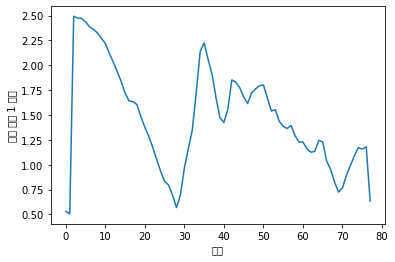

In [260]:
sns.lineplot(x='순서',y='내부 온도 1 평균',data=prac2)

In [195]:
total_data = pd.DataFrame()
pd.concat([total_data,mydf_2], axis=0).pivot_table(index="index",values=filter_data.columns,aggfunc='mean')

,내부 습도 1 최고,내부 습도 1 최저,내부 습도 1 평균,내부 온도 1 최고,내부 온도 1 최저,내부 온도 1 평균,내부 이슬점 최고,내부 이슬점 최저,내부 이슬점 평균
index,,,,,,,,,
0.0,16.05,13.60,14.70,14.00,13.85,13.90,4.90,3.65,4.25
0.5,14.90,13.25,14.05,14.00,13.70,13.80,4.45,3.50,3.75
1.0,14.30,12.75,13.45,14.05,13.90,13.95,4.20,3.40,3.70
1.5,14.95,12.05,13.05,14.15,13.80,13.90,4.45,2.80,3.40
2.0,13.85,12.75,13.35,14.00,13.85,13.95,3.90,3.40,3.65
...,...,...,...,...,...,...,...,...,...
36.0,29.35,28.25,29.00,12.55,12.45,12.50,8.25,7.95,8.10
36.5,29.55,28.85,29.30,12.55,12.45,12.50,8.25,8.10,8.20
37.0,29.90,28.40,29.05,12.75,12.55,12.65,8.70,7.95,8.15
